In [139]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [140]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [141]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

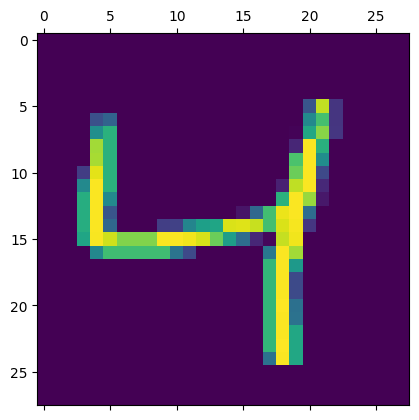

In [142]:
plt.matshow(x_train[2])

In [143]:
y_train[2]

4

In [144]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [145]:
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape= (784,),activation="relu"),
    keras.layers.Dense(10,activation='softmax')
    # one hidden layer or 128 neurons
])

C:\Users\samiu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [147]:
model.compile(
    optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8708 - loss: 0.4585
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9612 - loss: 0.1299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9745 - loss: 0.0857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.9809 - loss: 0.0635
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9854 - loss: 0.0483
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9882 - loss: 0.0394
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9901 - loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9931 - loss: 0.0235
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9944 - loss: 0.0186
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9951 - loss: 0.0169


In [148]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9702 - loss: 0.1099


[0.09002738445997238, 0.9747999906539917]

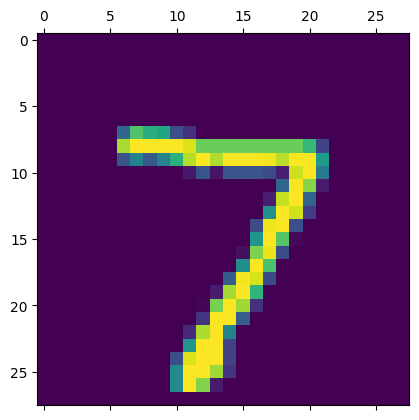

In [149]:
plt.matshow(x_test[0])

In [150]:
y_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


In [151]:
np.argmax(y_pred[0])

7

In [152]:
y_predicted_labeles = [np.argmax(i) for i in y_pred]
y_predicted_labeles[:5]

[7, 2, 1, 0, 4]

In [153]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labeles)


Text(95.72222222222221, 0.5, 'Truth')

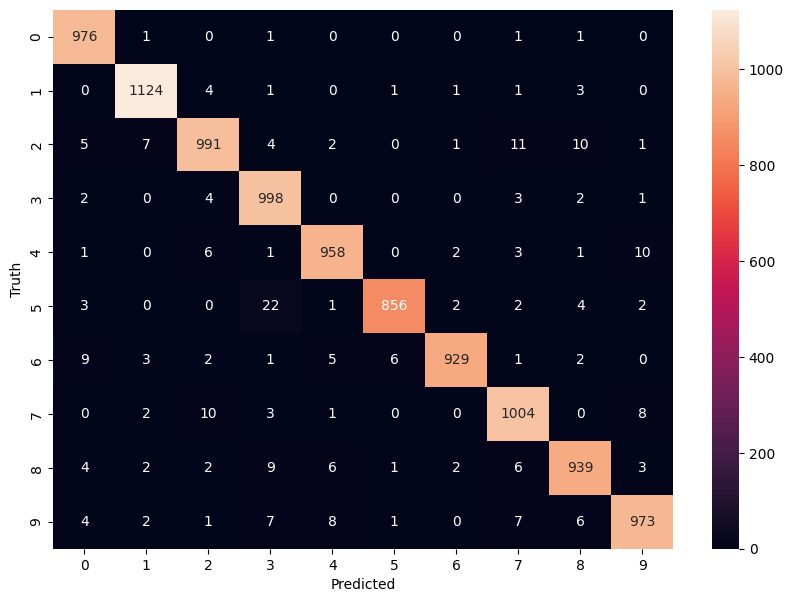

In [154]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
# Confusion Matrix Visualization
